In [196]:
import numpy as np
import os

In [197]:
# Get labels
y = np.loadtxt("data/labels.csv", delimiter=',', dtype='int')    # 0 = TD, 1 = ASD

# Get features
num_files = len([name for name in os.listdir('./data/networks') if name.startswith('train_')])
data_lst = []
for i in range(num_files):
    x = np.tril(np.loadtxt(f"data/networks/train_{i}.csv", delimiter=','), -1)[1:,:-1].flatten()
    data_lst.append(x)

X = np.array(data_lst)
print(X.shape)

(120, 1156)


In [198]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [208]:
# Set up grid search
svc = SVC()
parameters = {'C':[.1, 1., 10.]}
gs = GridSearchCV(svc, parameters, cv=5)

In [209]:
# Run grid search
scores = []
X_cp = X.copy()
for percentile in range(0, 101):
    for x in X_cp:
        threshold = np.percentile(x, percentile)
        x[x < threshold] = 0

    gs.fit(X_cp, y)
    mean_scores = gs.cv_results_['mean_test_score']
    scores.append(mean_scores)
    
    if percentile % 25 == 0:
        print(percentile, mean_scores)
        print("---------------------")

0 [0.51666667 0.53333333 0.56666667]
---------------------
25 [0.51666667 0.50833333 0.575     ]
---------------------
50 [0.51666667 0.50833333 0.58333333]
---------------------
75 [0.51666667 0.53333333 0.56666667]
---------------------
100 [0.51666667 0.44166667 0.46666667]
---------------------


In [201]:
import matplotlib.pyplot as plt

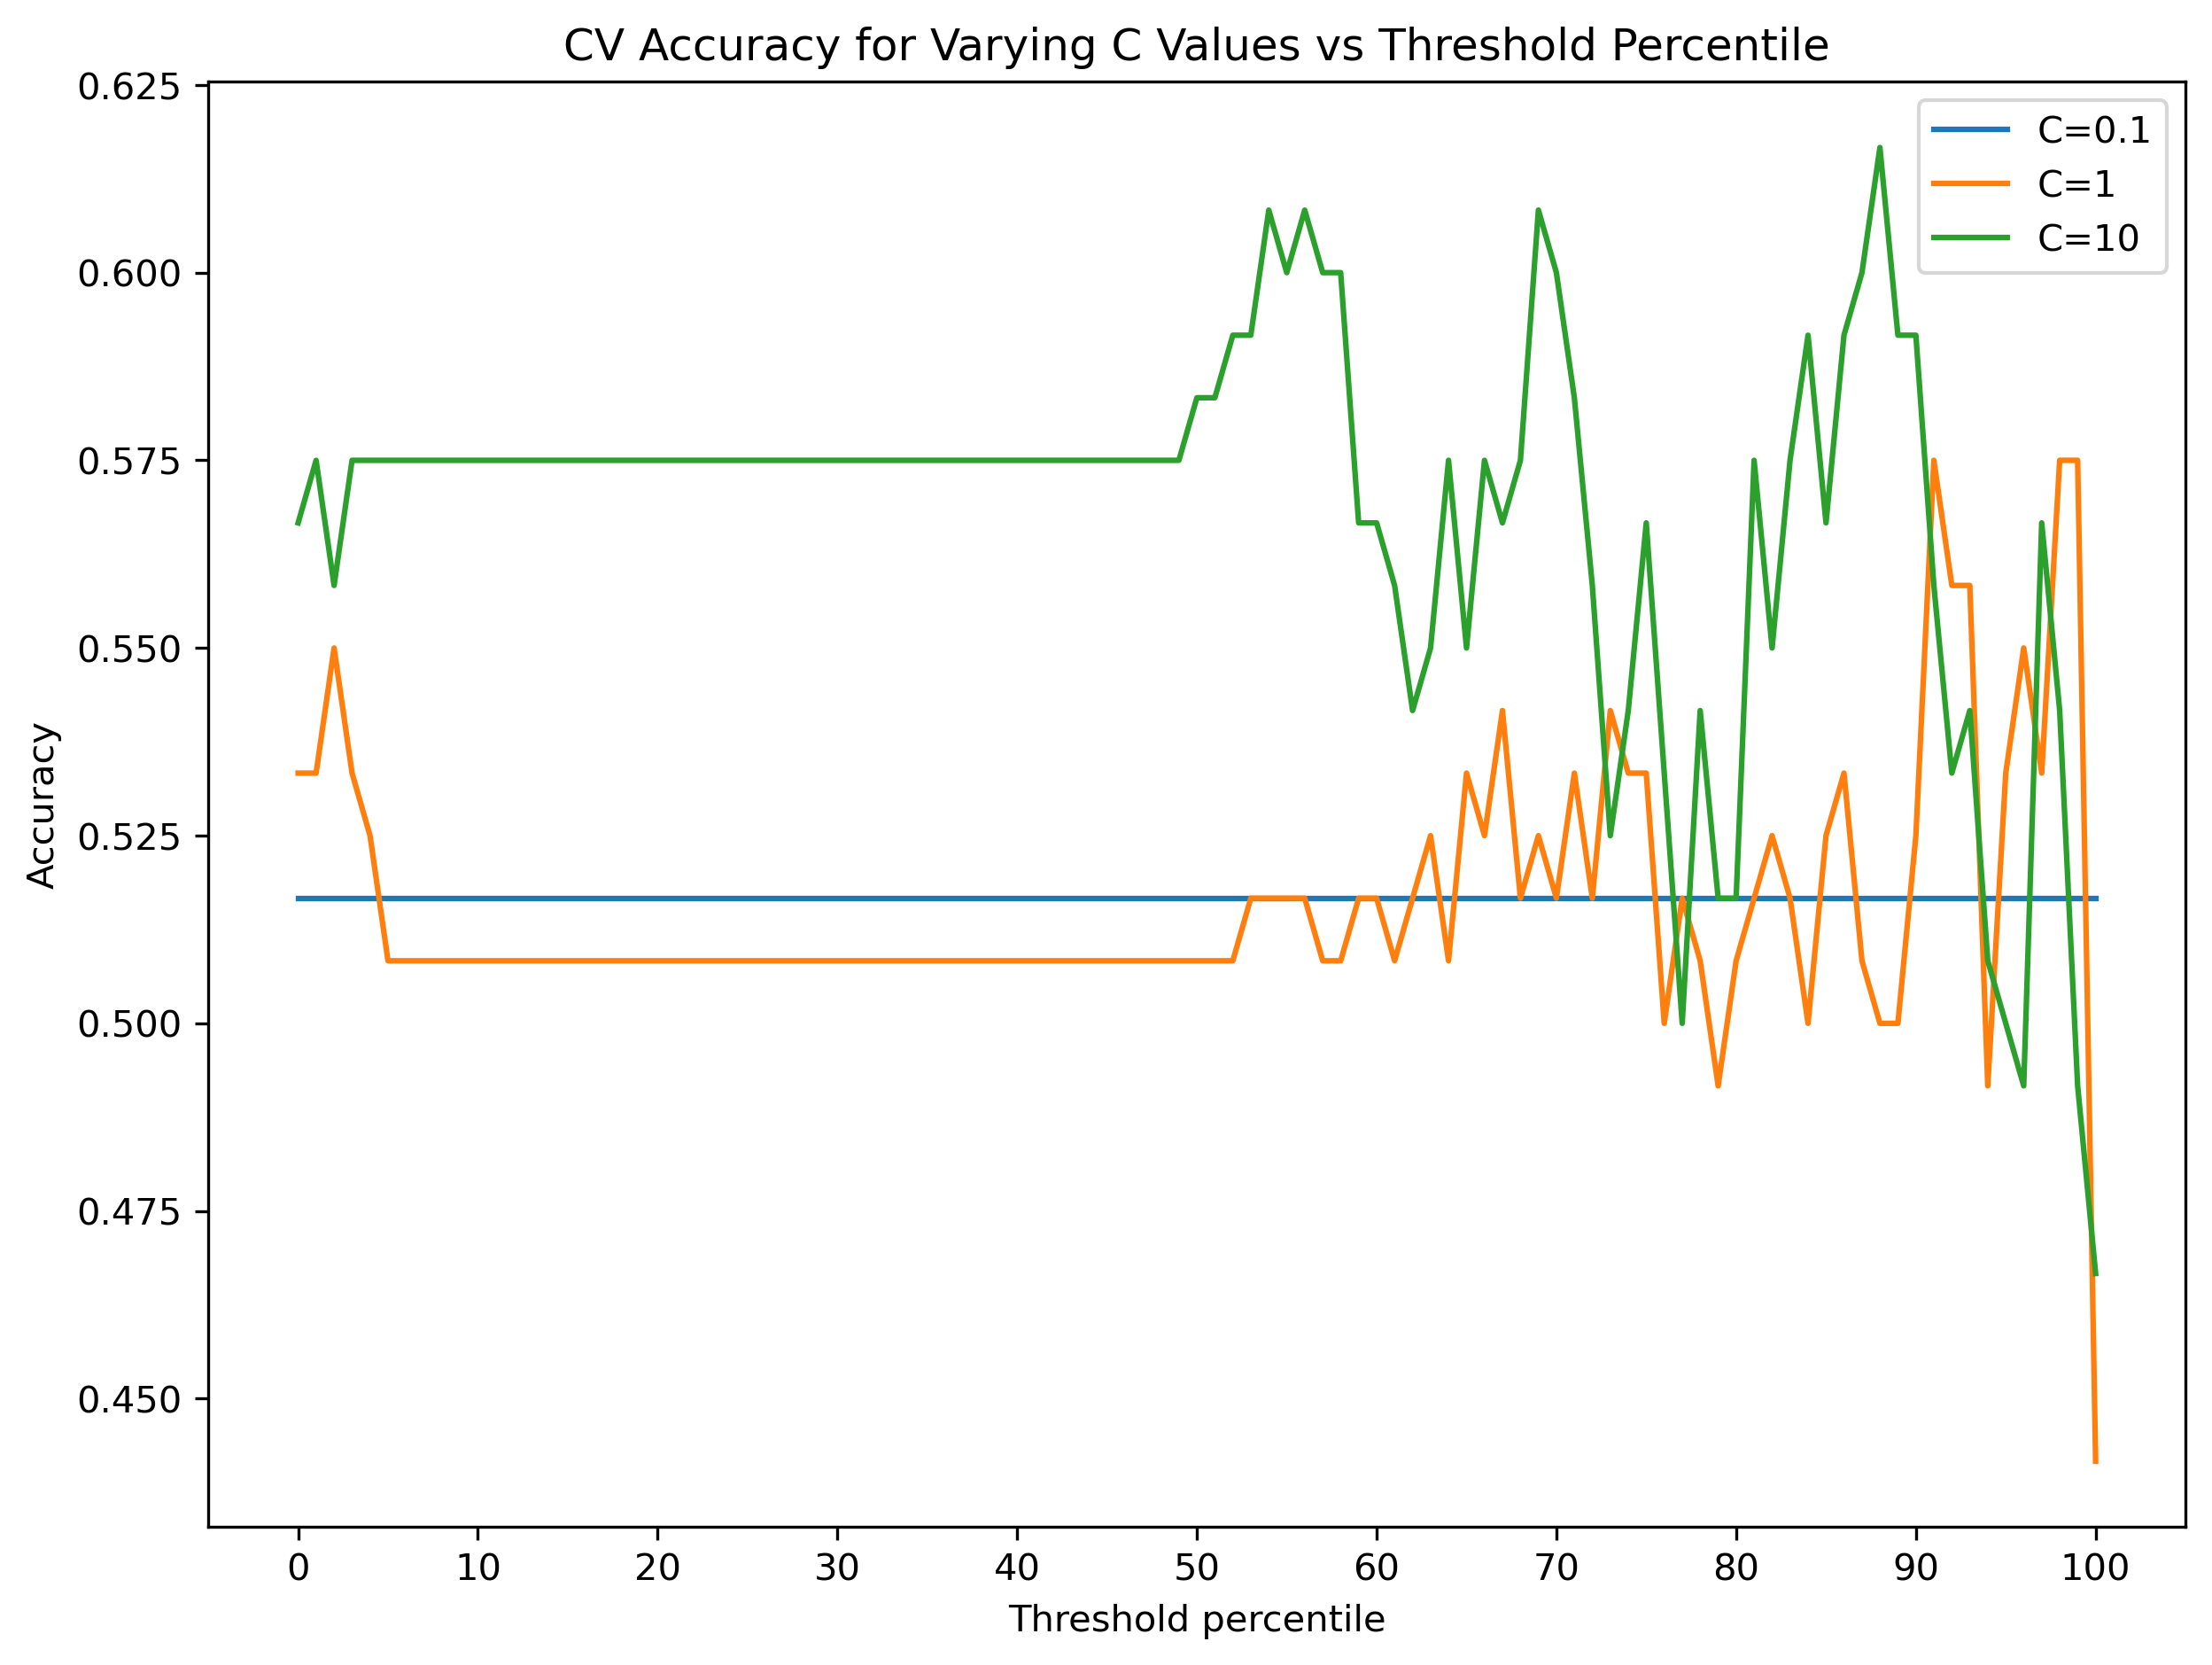

In [210]:
# Plot results of grid search
plt.figure(dpi=300, figsize=[9.6, 7.2])

for i in range(3):
    plt.plot(list(range(0,101)), [entry[i] for entry in scores])

plt.legend(["C=0.1","C=1","C=10"])
plt.title("CV Accuracy for Varying C Values vs Threshold Percentile")

plt.ylabel("Accuracy")

plt.xlabel("Threshold percentile")
plt.xticks(list(range(0,101,10)))

plt.show()

# plt.savefig("CV_accuracy.pdf")

In [211]:
# Find maximum accuracy and get corresponding threshold percentile
i_max = 0
score_max = 0
for i, score in enumerate(scores):
    if score[2] > score_max:
        score_max = score[2]
        i_max = i
print(i_max, score_max)

88 0.6166666666666666
